# Gathering data

1.	The WeRateDogs Twitter archive

First we need to change the directory by:
    1. open CMD
    2. type  cd E:\Google Drive-MST\Machine Learning\1-Data Analyst\Project4
    3. type jupyter notebook

- test the directory

In [805]:
pwd

'E:\\Google Drive-MST\\Machine Learning\\1-Data Analyst\\Project4'

In [1]:
import pandas as pd
import numpy as np

In [807]:
twitter_archive=pd.read_csv("twitter_archive_enhanced.csv",sep=',')
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [808]:
twitter_archive.shape

(2356, 17)

In [809]:
import requests
import os

# downloading .tsv file from webpage
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

# saving the .tsv in the folder 
with open ("image-predictions.tsv",mode='wb' ) as file:
    file.write(response.content)
    
# reading the .tsv file
image_predictions=pd.read_csv("image-predictions.tsv",sep="\t")

In [810]:
# Visualizing content of .tsv file
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1947,862722525377298433,https://pbs.twimg.com/media/C_kBjuUUIAArs2-.jpg,1,basset,0.393330,True,beagle,0.242034,True,boxer,0.077692,True
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,True,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True
1290,751456908746354688,https://pbs.twimg.com/ext_tw_video_thumb/75145...,1,golden_retriever,0.714409,True,Afghan_hound,0.066163,True,chow,0.028413,True
1653,809920764300447744,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,1,Norwich_terrier,0.397163,True,toy_poodle,0.274540,True,miniature_poodle,0.134667,True


In [811]:
image_predictions.shape

(2075, 12)

In [4]:
#reading json file
import json
with open('tweet_json.txt') as file:
    data = []
    for line in file:
        data.append(json.loads(line))
        
tweet_json = pd.DataFrame(data)

In [5]:
list(tweet_json)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [6]:
# I am only interested in three columns. lest redefind the tweet_json
tweet_json=tweet_json[["id", "retweet_count", "favorite_count"]]
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
tweet_json.shape

(2354, 3)

# Assessing data (Visually and Programmatically)
#### Quality Issue
8 issues are mentioned 

In [815]:
twitter_archive.iloc[45,:]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [816]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Quality issue-1: in twitter_archive, image_predictions, and tweet_json dataframes all id columns (such as tweet_id) should be string.**    

**Quality issue-2: in twitter_archive the timestamp column should not be object. It should be date type.**    


In [817]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [818]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


**Quality issue-3: Name of id column in tweet_json is different from the other two dataframes (tweet_id)**             

In [819]:
sum(twitter_archive.name.isnull())

0

In [820]:
df1=twitter_archive[["tweet_id", "text","name"]];
df1.query('name!="None"')

,tweet_id,text,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Zoey
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie
10,890006608113172480,This is Koda. He is a South Australian decksha...,Koda
11,889880896479866881,This is Bruno. He is a service shark. Only get...,Bruno


In [821]:
df2=twitter_archive[twitter_archive['name'].str[0].str.islower()]
df2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [822]:
df2.shape

(109, 17)

In [823]:
df3=df2[df2['text'].str.contains("name")]
df3.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None


**Quality issue-4: In twitter_archive dataframe, the name of 109 dogs are wrong. By mistake their name is: a, an, the, quite...**

In [824]:
df1.query('name=="None"')

,tweet_id,text,name
5,891087950875897856,Here we have a majestic great white breaching ...,None
7,890729181411237888,When you watch your owner call another dog a g...,None
12,889665388333682689,Here's a puppo that seems to be on the fence a...,None
24,887343217045368832,You may not have known you needed to see this ...,None
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We...,None
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None
35,885518971528720385,I have a new hero and his name is Howard. 14/1...,None
37,885167619883638784,Here we have a corgi undercover as a malamute....,None
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is gr...",None


In [825]:
df1.query('name=="None"').shape

(745, 3)

**Quality issue-5: In twitter_archive dataframe, the name of 745 dogs is "None" which is wrong.**

**Quality issue-6: In twitter_archive dataframe, the name of dog for twieet_id of "885518971528720385" should be Howard **

**Quality issue-7: In twitter_archive dataframe, in the text file there are many compains about "presenting the pictures which does not contain dog picture such as:**
- 883117836046086144 Please only send dogs. We don't rate mechanics...	
- 880872448815771648 Ugh not again. We only rate dogs. Please don't...
- 880095782870896641 Please don't send in photos without dogs in th.
- 872486979161796608 We. Only. Rate. Dogs. Do not send in other thi...

In [826]:
twitter_archive.text.head(50)

0     This is Phineas. He's a mystical boy. Only eve...
1     This is Tilly. She's just checking pup on you....
2     This is Archie. He is a rare Norwegian Pouncin...
3     This is Darla. She commenced a snooze mid meal...
4     This is Franklin. He would like you to stop ca...
5     Here we have a majestic great white breaching ...
6     Meet Jax. He enjoys ice cream so much he gets ...
7     When you watch your owner call another dog a g...
8     This is Zoey. She doesn't want to be one of th...
9     This is Cassie. She is a college pup. Studying...
10    This is Koda. He is a South Australian decksha...
11    This is Bruno. He is a service shark. Only get...
12    Here's a puppo that seems to be on the fence a...
13    This is Ted. He does his best. Sometimes that'...
14    This is Stuart. He's sporting his favorite fan...
15    This is Oliver. You're witnessing one of his m...
16    This is Jim. He found a fren. Taught him how t...
17    This is Zeke. He has a new stick. Very pro

In [827]:
twitter_archive.rating_numerator.iloc[46]

13

** Quality issue-8:** in twitter_archive dataframe, sometimes the rating_nominator and rating_denominator of text column is different from the current rating_nominator and rating_denominator. Example:
Row 45 the rating_nominator and rating_denominator from text files are 13.5 and 10, however in the rating_nominator and rating_denominator columns it is 13 and 10! 

In [828]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [829]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [830]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [831]:
twitter_archive.query('rating_denominator!=10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [832]:
twitter_archive.query('rating_denominator!=10').shape

(23, 17)

** Quality issue-9: in twitter_archive dataframe, the rating_denominator of 23 record is not equal to 10 and for every other record is 10. It seems incorrect.**             

In [833]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1360,761004547850530816,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1245,747512671126323200,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1,Cardigan,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True
40,666691418707132416,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
1995,874296783580663808,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False


In [834]:
tweet_json.sample(5)

,id,retweet_count,favorite_count
1751,678800283649069056,1018,2810
74,878281511006478336,1349,7913
967,750132105863102464,1440,3990
1367,702332542343577600,1755,3491
1628,684538444857667585,1085,2915


In [835]:
twitter_archive[twitter_archive.tweet_id.duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [836]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [837]:
tweet_json[tweet_json.id.duplicated(keep=False)]

,id,retweet_count,favorite_count


In [838]:
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [839]:
sum(twitter_archive["tweet_id"].isnull())

0

#### Tidiness
3 issues are mentioned 

In [840]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Tidiness issue-1: in twitter_archive, there is no need for having 4 columns presning different dog stages** 

**Tidiness issue-2: in twitter_archive, in timestamp column, date and time are combined. They should be in two different columns** 


In [841]:
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


**Tidiness issue-3: in image_predictions, there are three model for predicting breed. We only need one with highest confidenc einterval.** 

In [842]:
tweet_json.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


## Observed issues are:

*Quality issues*

- Quality issue-1: in twitter_archive, image_predictions, and tweet_json dataframes all id columns (such as tweet_id) should be string.

- Quality issue-2: in twitter_archive the timestamp column should not be object. It should be date type.

- Quality issue-3: Name of id column in tweet_json is different from the other two dataframes (tweet_id)

- Quality issue-4: In twitter_archive dataframe, the name of 109 dogs are wrong. By mistake their name is: a, an, the, quite...

- Quality issue-5: In twitter_archive dataframe, the name of 745 dogs is "None" which is wrong.

- Quality issue-6: In twitter_archive dataframe, the name of dog for twieet_id of "885518971528720385" should be Howard

- Quality issue-7: In twitter_archive dataframe, in the text file there are many compains about "presenting the pictures which does not contain dog picture such as:
 - 883117836046086144 Please only send dogs. We don't rate mechanics...
 - 880872448815771648 Ugh not again. We only rate dogs. Please don't...
 - 880095782870896641 Please don't send in photos without dogs in th.
 - 872486979161796608 We. Only. Rate. Dogs. Do not send in other thi...

- Quality issue-8: in twitter_archive dataframe, sometimes the rating_nominator and rating_denominator of text column is different from the current rating_nominator and rating_denominator. Example: Row 45 the rating_nominator and rating_denominator from text files are 13.5 and 10, however in the rating_nominator and rating_denominator columns it is 13 and 10! 
- Quality issue-9: in twitter_archive dataframe, the rating_denominator of 23 record is not equal to 10 and for every other record is 10. It seems incorrect.

<br> *Tidiness issues*

- Tidiness issue-1: in twitter_archive, there is no need for having 4 coulumns presning different dog stages

- Tidiness issue-2: in twitter_archive, in timestamp column, date and time are combined. They should be in two different columns
- Tidiness issue-3: in image_predictions, there are three model for predicting breed. We only need one with highest confidenc einterval.
- Tidiness issue-4: We do not need three dataframe for these project. One dataframe should be enough. 

# Cleaning data

Before cleaning, lets prepare a copy of each dataframe and clean the copy ones. 

In [843]:
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
tweet_json_clean=tweet_json.copy()

In [844]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Cleaning quality issues

**Definie-1 (quality issue):** Change the type of all "id" columns in twitter_archive, image_predictions, and tweet_json from int64 to string

**Code**

In [845]:
twitter_archive_clean[["tweet_id","in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id"]]=twitter_archive_clean[["tweet_id","in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id"]].astype(str)
image_predictions_clean[["tweet_id"]]=image_predictions_clean[["tweet_id"]].astype(str)
tweet_json_clean[["id"]]=tweet_json_clean[["id"]].astype(str)

**Test**

In [846]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)


In [847]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [848]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**Definie-2 (quality issue):** in twitter_archive the timestamp column should not be object.

**Code and Test** This problem will be solved while I am fixing the second tidiness issue

**Definie-3 (quality issue):** Change the name of "id" column in tweet_json dataframe to "tweet_id"

**Code**

In [849]:
tweet_json_clean=tweet_json_clean.rename(columns = {'id':'tweet_id'})

**Test**

In [850]:
list(tweet_json_clean)

['tweet_id', 'retweet_count', 'favorite_count']

Quality issue-4: In twitter_archive dataframe, the name of 109 dogs are wrong. By mistake their name is: a, an, the, quite...

**Definie-4 (quality issue):** Remove the rows which contains wrong names for dogs in "name" column. 

**Code**

In [851]:
# list of wrong names in name column of twitter_archive
wrong_names=twitter_archive_clean[twitter_archive_clean['name'].str[0].str.islower()]
list_of_wrong_names=wrong_names.name.unique()

In [852]:
list_of_wrong_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [853]:
twitter_archive_clean.shape

(2356, 17)

In [854]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['name'].isin(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'])]

**Test**

In [855]:
twitter_archive_clean.shape

(2247, 17)

In [856]:
twitter_archive_clean.name.sample(5)

350      Dutch
1509       Leo
1044     Stark
2121    Peanut
331      Rhino
Name: name, dtype: object

**Definie-5 (quality issue):** Remove the rows which assigned "None" as the name dog in twitter_archive

**Code**

In [857]:
twitter_archive_clean = twitter_archive_clean.query('name!="None"')

**Test**

In [858]:
twitter_archive_clean.query('name=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define-6 (quality issue):** In twitter_archive dataframe, change the name of dog for twieet_id of "885518971528720385" from "None" to Howard.

**Code**

In [859]:
twitter_archive_clean.query('tweet_id=="885518971528720385"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [860]:
# I deleted that information from twitter_archive_clean. Lets recover it from twitter_archive and the add it to twitter_archive_clean.
twitter_archive.query('tweet_id=="885518971528720385"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None


In [861]:
twitter_archive_copy=twitter_archive.copy()
twitter_archive_copy.loc[35,"name"]="Howard"
Howard_row=twitter_archive_copy.query('tweet_id=="885518971528720385"')
Howard_row.name

35    Howard
Name: name, dtype: object

In [862]:
twitter_archive_clean=twitter_archive_clean.append(Howard_row,ignore_index=True)

**Test**

In [863]:
twitter_archive_clean.query('tweet_id==885518971528720385')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1502,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,None,None,None,None


**Define-7 (quality issue): ** Remove the rows of twitter_archive which contain below complains in text column:
 - Please only send dogs. We don't rate mechanics...
 - Ugh not again. We only rate dogs. Please don't...
 - Please don't send in photos without dogs in th.
 - We. Only. Rate. Dogs. Do not send in other thi...

**Code**

In [864]:
twitter_archive_clean.query('tweet_id==883117836046086144')
twitter_archive_clean.query('tweet_id==880872448815771648')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Test**

Apparenetly all of these rows are removed during previous steps of the cleaning. 

**Define-8:** In twitter_archive dataframe, re-extract the correct rating values from text file and save them into rating_nominator and rating_denominator columns. 

**Code**

In [865]:
twitter_archive_clean[['rating_numerator', 'rating_denominator ']] = twitter_archive_clean['text'].str.extract('(-?\d+(?:\.\d+)?)/(-?\d+(?:\.\d+)?)').astype(float)

**Test**

In [866]:
pd.set_option('display.max_colwidth', -1)
twitter_archive_clean.iloc[45,:]

tweet_id                      880221127280381952                                                                                                                  
in_reply_to_status_id         nan                                                                                                                                 
in_reply_to_user_id           nan                                                                                                                                 
timestamp                     2017-06-29 00:27:25 +0000                                                                                                           
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                  
text                          Meet Jesse. He's a Fetty Woof. His tongue ejects without warning. A true bleptomaniac. 12/10 would snug well https://t.co/fUod0tVmvK
retweeted_status_id   

In [867]:
pd.set_option('display.max_colwidth', 50)

**Definie-9 (quality issue):** Remove the row in twitter_archive that has a rating_denominator other than 10. 

**Code**

In [868]:
twitter_archive_clean.shape

(1503, 18)

In [869]:
twitter_archive_clean=twitter_archive_clean.query('rating_denominator=="10"')

**Test**

In [870]:
twitter_archive_clean.shape

(1500, 18)

In [871]:
twitter_archive_clean.query('rating_denominator!="10"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_denominator


## Cleaning tidiness issues

**Definie-1 (tidiness issue):** Combine the 4 coulmns of dog stages ('doggo','floofer','pupper','puppo') in the twitter_archive

**Code**

In [872]:
twitter_archive_clean.shape

(1500, 18)

In [873]:
# selecting 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter_archive_clean_stages=twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]
# defining None values as NaN
twitter_archive_clean_stages = twitter_archive_clean_stages.mask(twitter_archive_clean_stages.eq('None'))
#If there are different stages of one dog, combine them (with one "," between them), otherwise enter None
twitter_archive_clean_stages["stages"] = twitter_archive_clean_stages.apply(lambda x: None if x.isnull().all() else ','.join(x.dropna()), axis=1)
#If there are more than one stage of a dog, change its name to multiple
twitter_archive_clean_stages.loc[twitter_archive_clean_stages['stages'].str.contains(",",na=False),'stages']="multiple"
# drop 'doggo', 'floofer', 'pupper', 'puppo' from the clean and new dataframes
twitter_archive_clean_stages=twitter_archive_clean_stages.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
twitter_archive_clean=twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

twitter_archive_clean=pd.concat([twitter_archive_clean, twitter_archive_clean_stages], axis=1)

**Test**

In [874]:
twitter_archive_clean.shape

(1500, 15)

In [875]:
twitter_archive_clean.query('stages=="multiple"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating_denominator,stages
323,817777686764523521,nan,nan,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",nan,nan,NaN,https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,10.0,multiple
410,801115127852503040,nan,nan,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,nan,nan,NaN,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,10.0,multiple
508,785639753186217984,nan,nan,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,nan,nan,NaN,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,10.0,multiple
641,759793422261743616,nan,nan,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",nan,nan,NaN,https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,10.0,multiple


**Definie-2 (tidiness issue):** Seperate time and data in timestamp column of twitter_archive.

**Code**

In [876]:
twitter_archive_clean.timestamp.head(5)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [877]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['date'] = [d.date() for d in twitter_archive_clean['timestamp']]
twitter_archive_clean['time'] = [d.time() for d in twitter_archive_clean['timestamp']]
twitter_archive_clean=twitter_archive_clean.drop(columns=['timestamp'])

**Test**

In [878]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating_denominator,stages,date,time
0,892420643555336193,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,10.0,None,2017-08-01,16:23:56
1,892177421306343426,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,10.0,None,2017-08-01,00:17:27
2,891815181378084864,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,10.0,None,2017-07-31,00:18:03
3,891689557279858688,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,10.0,None,2017-07-30,15:58:51
4,891327558926688256,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,10.0,None,2017-07-29,16:00:24


**Definie-2 (quality issue):** in twitter_archive, convert object type of "date" and "time" column to datetime type.

**Code**

In [879]:
import datetime as dt
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'])
twitter_archive_clean['time'] = twitter_archive_clean.date.values.astype('M8[D]')

**Test**

In [880]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1502
Data columns (total 16 columns):
tweet_id                      1500 non-null object
in_reply_to_status_id         1499 non-null object
in_reply_to_user_id           1499 non-null object
source                        1500 non-null object
text                          1500 non-null object
retweeted_status_id           1499 non-null object
retweeted_status_user_id      1499 non-null object
retweeted_status_timestamp    111 non-null object
expanded_urls                 1500 non-null object
rating_numerator              1500 non-null float64
rating_denominator            1500 non-null int64
name                          1500 non-null object
rating_denominator            1500 non-null float64
stages                        204 non-null object
date                          1500 non-null datetime64[ns]
time                          1500 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(11)
me

**Definie-3 (tidiness issue):** Only keep the predition with highest confidence interval in image_predictions dataframe.

**Code**

In [881]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [882]:
image_predictions_clean_not_model=image_predictions_clean[['tweet_id','jpg_url','img_num',]]
image_predictions_clean_model=image_predictions_clean[[ 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]
image_predictions_clean_model.head(1)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [883]:
image_predictions_clean_model.columns = ["model1", "confidence1", "prediction1","model2","confidence2","prediction2","model3","confidence3","prediction3"]
list(image_predictions_clean_model)

['model1',
 'confidence1',
 'prediction1',
 'model2',
 'confidence2',
 'prediction2',
 'model3',
 'confidence3',
 'prediction3']

In [884]:
Breed = []
Confidence = []

for i in range(len(image_predictions_clean_model['model1'])):
    confidences = [image_predictions_clean_model['confidence{0}'.format(model)][i] for model in range(1,4)]
    breeds = [image_predictions_clean_model['model{0}'.format(model)][i] for model in range(1,4)]
    isDog = [image_predictions_clean_model['prediction{0}'.format(model)][i] for model in range(1,4)]

    best_one = max(zip(confidences, breeds, isDog), key=lambda M: M[0])

    breed = best_one[1]
    confidence = best_one[0]

    if not (True in isDog):
        breed = 'NA'
        confidence = "NA"

    Breed.append(breed)
    Confidence.append(confidence)

breed_confidence=(pd.DataFrame({'breed': Breed,'confidence': Confidence}))

breed_confidence.head(5)

,breed,confidence
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311


In [885]:
image_predictions_clean=pd.concat([image_predictions_clean_not_model, breed_confidence], axis=1)

In [886]:
#Remove the rows with "NA"
image_predictions_clean=image_predictions_clean.query('confidence!="NA"')

**Test**

In [887]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


** Definie-4 (tidiness issue):** Merge three dataframes to one.  

**Code**

In [888]:
twitter_archive_clean.shape, image_predictions_clean.shape, tweet_json_clean.shape

((1500, 16), (1751, 5), (2354, 3))

In [889]:
from functools import reduce
dfs = [twitter_archive_clean, image_predictions_clean, tweet_json_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)
twitter_archive_master.shape

(1227, 22)

# Storing

Save the merged dataframe into a csv file. 

In [890]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

# Analyzing

**Insight-1:** What is the population of each dog "stage" (doggo,floofer,pupper,puppo) in the data?

In [891]:
twitter_archive_master.groupby("stages")["tweet_id"].count().reset_index().sort_values('tweet_id', ascending=False)

,stages,tweet_id
3,pupper,95
0,doggo,36
4,puppo,16
1,floofer,5
2,multiple,3


As shown in the above results, the pupper has the most counts 

**Insight-2:** How the overal number of "favorite_count"s changes year by year?

In [892]:
twitter_archive_master.groupby(twitter_archive_master['date'].dt.year)['favorite_count'].agg(['sum', 'mean', 'max'])

,sum,mean,max
date,,,
2015,821979,2643.019293,67100
2016,4593920,7155.638629,107015
2017,6026645,21995.054745,107956


As shown in the above results, the favorite_count"s of dogs has been increasing by time.

**Insight-3:** Is there any relationship between number of posted pictures and average rating_numerator and average favorite_count?

In [893]:
twitter_archive_master.groupby("img_num")["rating_numerator","favorite_count"].mean()

,rating_numerator,favorite_count
img_num,,
1,10.811981,8616.291866
2,11.479675,13803.569106
3,11.837838,11679.108108
4,12.090909,14025.136364


In [894]:
twitter_archive_master.groupby("img_num")["rating_numerator","favorite_count"].describe()

rating_numerator                                                     \
                   count       mean       std   min   25%   50%   75%   max   
img_num                                                                       
1                 1045.0  10.811981  1.706126   2.0  10.0  11.0  12.0  14.0   
2                  123.0  11.479675  1.161892   6.0  11.0  12.0  12.0  13.0   
3                   37.0  11.837838  1.301997   8.0  11.0  12.0  13.0  14.0   
4                   22.0  12.090909  1.150945  10.0  11.0  12.0  13.0  14.0   

        favorite_count                                                        \
                 count          mean           std     min      25%      50%   
img_num                                                                        
1               1045.0   8616.291866  11369.566813     0.0  1813.00   4149.0   
2                123.0  13803.569106  15260.903338     0.0  4683.00   8945.0   
3                 37.0  11679.108108   8543.225532     0.0  4917.00   9927.0   
4                 22.0  14025.136364  10343.903354  1551.0  6047.75  11581.0   

                            
             75%       max  
img_num                     
1        11271.0  107956.0  
2        17777.5  106827.0  
3        17092.0   31800.0  
4        16805.5   40325.0

# Visualizing

**Visualization 1:** How confidence of image prediction can change by average number of posted pictures?
<br>
<br>To answer to this question. I first, defined 4 categories as "low", "moderate_low","moderate_high","high" confidences. The margins of this categories are found by box-plot as below. Then, I devided the confidence column into this 4 groups and groupby by using that devisions. 

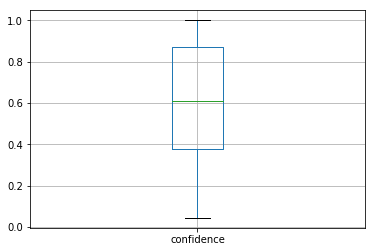

In [895]:
twitter_archive_master.confidence.plot(kind="box",grid=True)

definition of 4 groups of confidences.
 - low: [0, 0.4]
 - moderate_low: [0.4, 0.6]
 - moderate_high: [0.6, 0.8]
 - high: [0.8, 1]

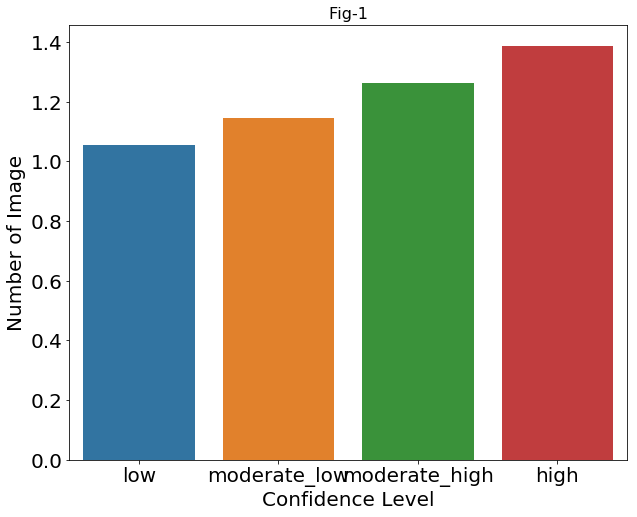

In [919]:
twitter_archive_master1=twitter_archive_master.copy()
bin_edges=[0, 0.4, 0.6,0.85,1]
bin_name=["low", "moderate_low","moderate_high","high"]
twitter_archive_master1["confidence_level"]=pd.cut(twitter_archive_master1.confidence,bin_edges, labels=bin_name)
grouped=twitter_archive_master1.groupby(["confidence_level"],as_index=False).mean()[["confidence_level","img_num"]];
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8));

ax=sns.barplot(x="confidence_level",y="img_num",data=grouped)
ax.set_xlabel("Confidence Level",fontsize=20)
ax.set_ylabel("Number of Image",fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Fig-1',fontsize=16)
plt.savefig('bar.png') 

The above figure depicts that by increasing the number of posted figures, the condidence of prediction increases from low to high.

**Visualization 2:** How the number of posted figures affect the rating_numerator?

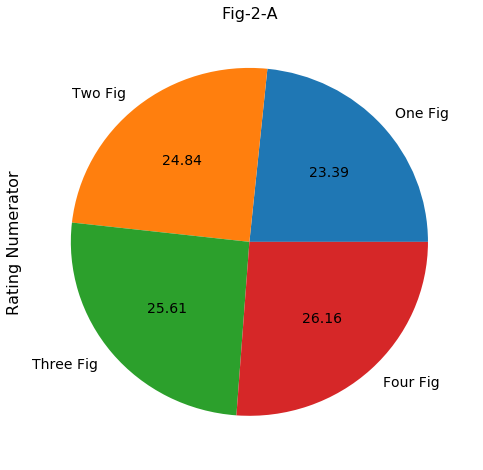

In [921]:
twitter_archive_master.groupby("img_num")["rating_numerator"].mean()\
.plot(kind='pie', labels=['One Fig','Two Fig','Three Fig','Four Fig'],autopct='%.2f',figsize=(8, 8),fontsize=14);
plt.ylabel('Rating Numerator',fontsize=16)
plt.title('Fig-2-A',fontsize=16)
plt.savefig('pie1.png') 

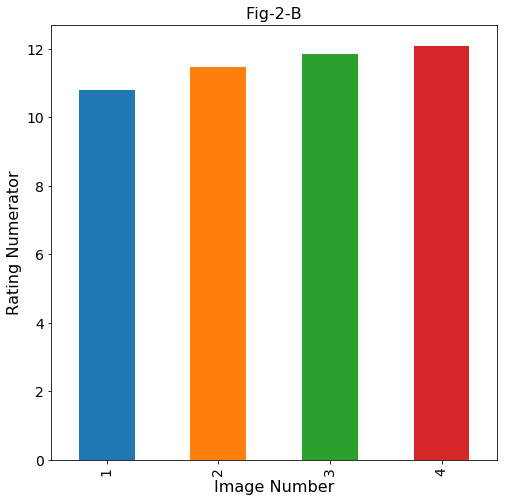

In [929]:
twitter_archive_master.groupby("img_num")["rating_numerator"].mean() \
.plot(kind='bar',figsize=(8, 8),fontsize=14);
plt.ylabel('Rating Numerator',fontsize=16)
plt.xlabel('Image Number',fontsize=16)
plt.title('Fig-2-B',fontsize=16)
plt.savefig('bar2.png') 

**Visualization 3:** How the number of posted figures affect the favorite_count (number of likes)?

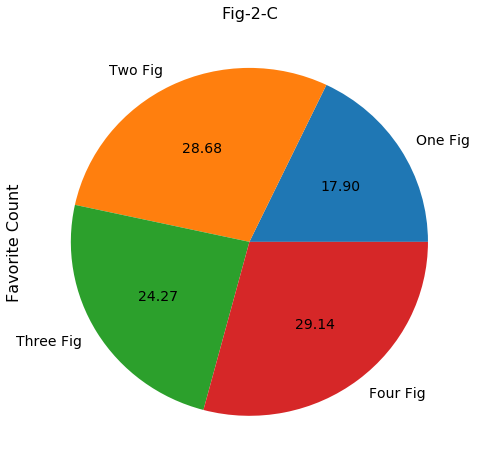

In [926]:
twitter_archive_master.groupby("img_num")["favorite_count"].mean().plot(kind='pie', \
labels=['One Fig','Two Fig','Three Fig','Four Fig'],autopct='%.2f',figsize=(8, 8),fontsize=14);
plt.ylabel('Favorite Count',fontsize=16)
plt.title('Fig-2-C',fontsize=16)
plt.savefig('pie2.png') 

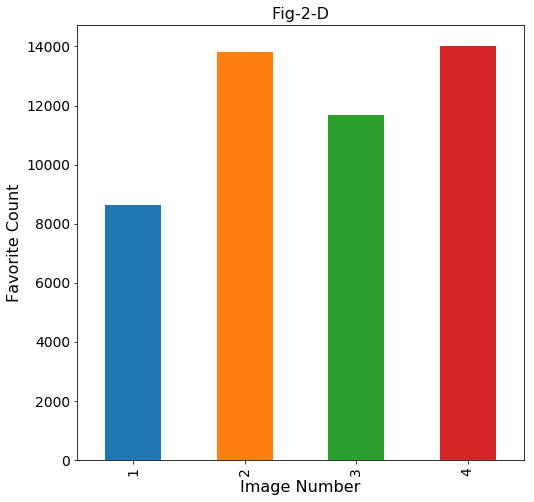

In [928]:
twitter_archive_master.groupby("img_num")["favorite_count"].mean().plot(kind='bar',figsize=(8, 8),fontsize=14);
plt.ylabel('Favorite Count',fontsize=16)
plt.xlabel('Image Number',fontsize=16)
plt.title('Fig-2-D',fontsize=16)
plt.savefig('bar3.png') 
